In [39]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import matplotlib.pyplot as plt
from scipy.integrate import quad

# **1) GENERATION DES DONNEES**

In [2]:
def generate_z(A,b,K,cov,x):
    z_O = []
    z_E = []
    for i in range(int(2**K)):
        z_O.append(np.random.multivariate_normal(A*x+b, (2/3)*cov))
        z_E.append(np.random.multivariate_normal(A*x+b, (2/3)*cov))
    z = z_O.copy()
    z.extend(z_E)
    return z, z_O, z_E

In [3]:
def generate_q_p(A,b,K,mean,cov,x,z,z_O,z_E):
    q = []
    p = []
    q_O = []
    p_O = []
    q_E = []
    p_E = []
    for i in range(int(2**(K+1))):
        q.append(multivariate_normal.pdf(z[i], mean=A*x+b, cov=(2/3)*cov))
        p.append(multivariate_normal.pdf(z[i], mean=mean, cov=cov)*multivariate_normal.pdf(x, mean=z[i], cov=cov))
    for i in range(int(2**(K))):
        q_O.append(multivariate_normal.pdf(z_O[i], mean=A*x+b, cov=(2/3)*cov))
        p_O.append(multivariate_normal.pdf(z_O[i], mean=mean, cov=cov)*multivariate_normal.pdf(x, mean=z_O[i], cov=cov))
        q_E.append(multivariate_normal.pdf(z_E[i], mean=A*x+b, cov=(2/3)*cov))
        p_E.append(multivariate_normal.pdf(z_E[i], mean=mean, cov=cov)*multivariate_normal.pdf(x, mean=z_E[i], cov=cov))
    return q, p, q_O, p_O, q_E, p_E

In [42]:
#x = np.random.multivariate_normal(np.zeros(20), 2*np.identity(20))
#z, z_O, z_E = generate_z(1,0,5,np.identity(20),x)
#q, p, q_O, p_O, q_E, p_E = generate_q_p(1,0,5,np.zeros(20), np.identity(20),x,z,z_O,z_E)
#w = np.log(p) - np.log(q)

# **2) FONCTIONS**

In [45]:
def sum_w(k,w):
    sum_w=0
    for i in range(k):
        sum_w += np.exp(w[i])
    return sum_w

In [57]:
def iwae(n_sim,k,mean,cov,theta):
    iwae=[]
    x = np.random.multivariate_normal(np.zeros(20)+theta, 2*cov)
    for i in range(n_sim):
        log_sum=0
        z, z_O, z_E = generate_z(1,0,k,cov,x)
        q, p, q_O, p_O, q_E, p_E = generate_q_p(1,0,k,mean,cov,x,z,z_O,z_E)
        w = np.log(p) - np.log(q)
        log_sum = np.log(sum_w(k,w))-np.log(k)
        iwae.append(log_sum)
    return np.mean(iwae)

In [58]:
iwae(100,5,np.zeros(20),np.identity(20),theta)

-33.67828279839485

# **3) FONCTION POUR PLOT LA LIKELIHOOD ESTIMEE**

In [61]:
def plot_iwae(debut,fin,pas,n_sim):
    theta = np.random.normal(0,1)
    print(theta)
    for i in range(n_sim):
        liste = np.linspace(debut,fin,pas)
        x = []
        y = []
        for k in liste:
            y.append(iwae(100,5,np.zeros(20)+k,np.identity(20),theta))
            x.append(k)
        print((i+1)/n_sim) 
    return x, y

0.8931218599674512
0.3333333333333333
0.6666666666666666
1.0


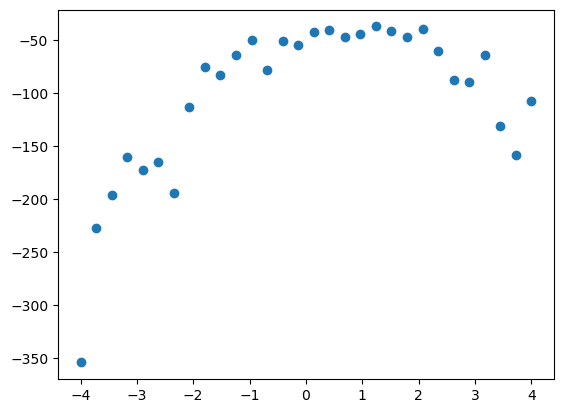

In [63]:
x,y = plot_iwae(-4,4,30,3)
plt.scatter(x,y)